<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/K_Nearest_Neighbors/Iris_Dataset_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

# Data Preprocessing

In [2]:
# Read Dataset
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df['target_name'] = df['target'].apply(lambda x: iris['target_names'][x])

print(df['target_name'].unique())
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

# Plot the Dataset

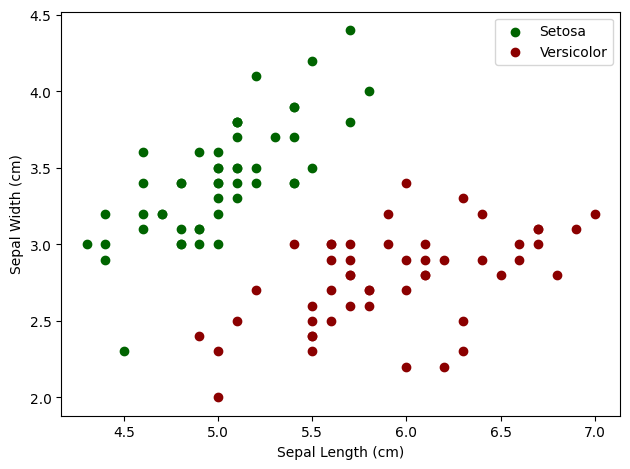

In [5]:
# Scatter plot between Sepal length and Seapal width for the setosa and versicolor
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="darkgreen", label="Setosa")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="darkred", label="Versicolor")

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.tight_layout()
plt.legend()
plt.show()

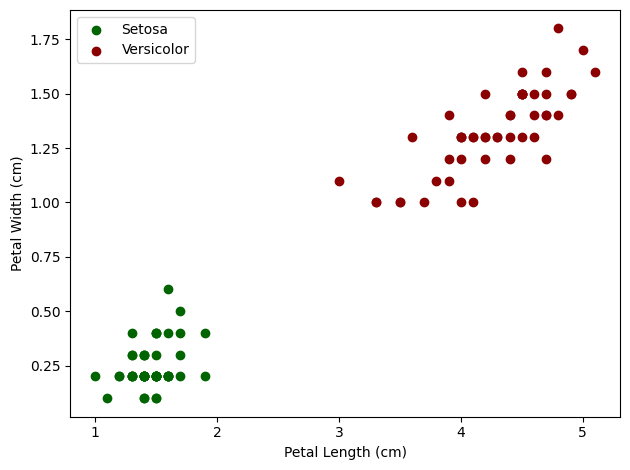

In [6]:
# Scatter plot between Petal length and Petal width for the setosa and versicolor
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="darkgreen", label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="darkred", label="Versicolor")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.legend()
plt.show()

# Train Test Split

In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'target_name'], axis="columns")
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (112, 4)
X_test Shape:  (38, 4)


# Create KNN (K Nearest Neighbour Classifier)

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn_model.score(X_test, y_test)

0.9473684210526315

In [11]:
y_pred = knn_model.predict(X_test)
y_pred[: 10]

array([0, 1, 1, 1, 2, 0, 0, 2, 1, 2])

In [12]:
pred_value = {
  'sepal length (cm)': [4.2],
  'sepal width (cm)': [2.2],
  'petal length (cm)': [3.2],
  'petal width (cm)': [4.2]
}

knn_model.predict(pd.DataFrame(pred_value))

array([2])

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 13]])

## Classification Report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      1.00      0.92        11
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38

